In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df_movie= pd.read_csv ("/Users/natalia/Downloads/PRE-PROCESSING-DATA-main/movies.dat",sep = '::',usecols=[0,1, 2],names = ["ID","Pelicula", "Genero"],encoding="iso-8859-1",engine="python")
df_movie

,ID,Pelicula,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


### <span style="color:blue">-Exercici 2</span>
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

In [3]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        3883 non-null   int64 
 1   Pelicula  3883 non-null   object
 2   Genero    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [4]:
df_movie.shape

(3883, 3)

In [25]:
#df_movie['Genero'] = df_movie['Género'].astype('str')
df_movie['Genero'].dtype

dtype('O')

In [6]:
df_movie.columns

Index(['ID', 'Pelicula', 'Genero'], dtype='object')

In [7]:
df_movie.isna().sum().sort_values

<bound method Series.sort_values of ID          0
Pelicula    0
Genero      0
dtype: int64>

In [8]:
df_movie.isnull().sum().sort_values

<bound method Series.sort_values of ID          0
Pelicula    0
Genero      0
dtype: int64>

In [9]:
df_movie.nunique()

ID          3883
Pelicula    3883
Genero       301
dtype: int64

In [10]:
#Seleccionamos sólo un género
df_movie['Genero']=df_movie['Genero'].str.split("|", expand=True)[0]
df_movie['Genero']

0       Animation
1       Adventure
2          Comedy
3          Comedy
4          Comedy
          ...    
3878       Comedy
3879        Drama
3880        Drama
3881        Drama
3882        Drama
Name: Genero, Length: 3883, dtype: object

In [11]:
df_movie['Pelicula']=df_movie.Pelicula.str.replace('(', ',').str.replace(')', '')
df_movie['Pelicula'].head()

0                      Toy Story ,1995
1                        Jumanji ,1995
2               Grumpier Old Men ,1995
3              Waiting to Exhale ,1995
4    Father of the Bride Part II ,1995
Name: Pelicula, dtype: object

In [12]:
#Separamos el año del nombre de la pelicula en dos nuevas columnas.
df_movie[['Nom_Pelicula','Año']] = df_movie['Pelicula'].str.rsplit(',', 1, expand=True)
df_movie

,ID,Pelicula,Genero,Nom_Pelicula,Año
0,1,"Toy Story ,1995",Animation,Toy Story,1995
1,2,"Jumanji ,1995",Adventure,Jumanji,1995
2,3,"Grumpier Old Men ,1995",Comedy,Grumpier Old Men,1995
3,4,"Waiting to Exhale ,1995",Comedy,Waiting to Exhale,1995
4,5,"Father of the Bride Part II ,1995",Comedy,Father of the Bride Part II,1995
...,...,...,...,...,...
3878,3948,"Meet the Parents ,2000",Comedy,Meet the Parents,2000
3879,3949,"Requiem for a Dream ,2000",Drama,Requiem for a Dream,2000
3880,3950,"Tigerland ,2000",Drama,Tigerland,2000
3881,3951,"Two Family House ,2000",Drama,Two Family House,2000


In [13]:
#Eliminamos la columna Pelicula que contenía el nombre y el año juntos.

df_movie.drop(['Pelicula'], axis=1)

,ID,Genero,Nom_Pelicula,Año
0,1,Animation,Toy Story,1995
1,2,Adventure,Jumanji,1995
2,3,Comedy,Grumpier Old Men,1995
3,4,Comedy,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995
...,...,...,...,...
3878,3948,Comedy,Meet the Parents,2000
3879,3949,Drama,Requiem for a Dream,2000
3880,3950,Drama,Tigerland,2000
3881,3951,Drama,Two Family House,2000


In [14]:
df_movie = df_movie[['ID', 'Nom_Pelicula', 'Año', 'Genero']]
df_movie

,ID,Nom_Pelicula,Año,Genero
0,1,Toy Story,1995,Animation
1,2,Jumanji,1995,Adventure
2,3,Grumpier Old Men,1995,Comedy
3,4,Waiting to Exhale,1995,Comedy
4,5,Father of the Bride Part II,1995,Comedy
...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy
3879,3949,Requiem for a Dream,2000,Drama
3880,3950,Tigerland,2000,Drama
3881,3951,Two Family House,2000,Drama


In [15]:
df_movie.isnull().sum()

ID              0
Nom_Pelicula    0
Año             0
Genero          0
dtype: int64

In [16]:
df_movie.isna().sum()

ID              0
Nom_Pelicula    0
Año             0
Genero          0
dtype: int64

In [17]:
df_movie.count()

ID              3883
Nom_Pelicula    3883
Año             3883
Genero          3883
dtype: int64

In [18]:
df_movie.describe(include=['object']).transpose()

,count,unique,top,freq
Nom_Pelicula,3883,3841,Hamlet,5
Año,3883,81,1996,345
Genero,3883,18,Drama,1176


In [19]:
df_movie['Año'] = df_movie.Año.astype(int)
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            3883 non-null   int64 
 1   Nom_Pelicula  3883 non-null   object
 2   Año           3883 non-null   int64 
 3   Genero        3883 non-null   object
dtypes: int64(2), object(2)
memory usage: 121.5+ KB


In [20]:
#Verificamos los registros duplicados.
df_movie.duplicated(subset=['Nom_Pelicula'])

0       False
1       False
2       False
3       False
4       False
        ...  
3878    False
3879    False
3880    False
3881    False
3882    False
Length: 3883, dtype: bool

In [21]:
df_movie.loc[df_movie.duplicated()]

,ID,Nom_Pelicula,Año,Genero


In [22]:
df_movie.head()

,ID,Nom_Pelicula,Año,Genero
0,1,Toy Story,1995,Animation
1,2,Jumanji,1995,Adventure
2,3,Grumpier Old Men,1995,Comedy
3,4,Waiting to Exhale,1995,Comedy
4,5,Father of the Bride Part II,1995,Comedy


### <span style="color:blue"> - Exercici 3</span>

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

In [26]:
df_movie['Año'].min()

1919

In [27]:
df_movie['Año'].max()

2000

In [29]:
df_movie.groupby('Año')['Nom_Pelicula'].count()

Año
1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: Nom_Pelicula, Length: 81, dtype: int64

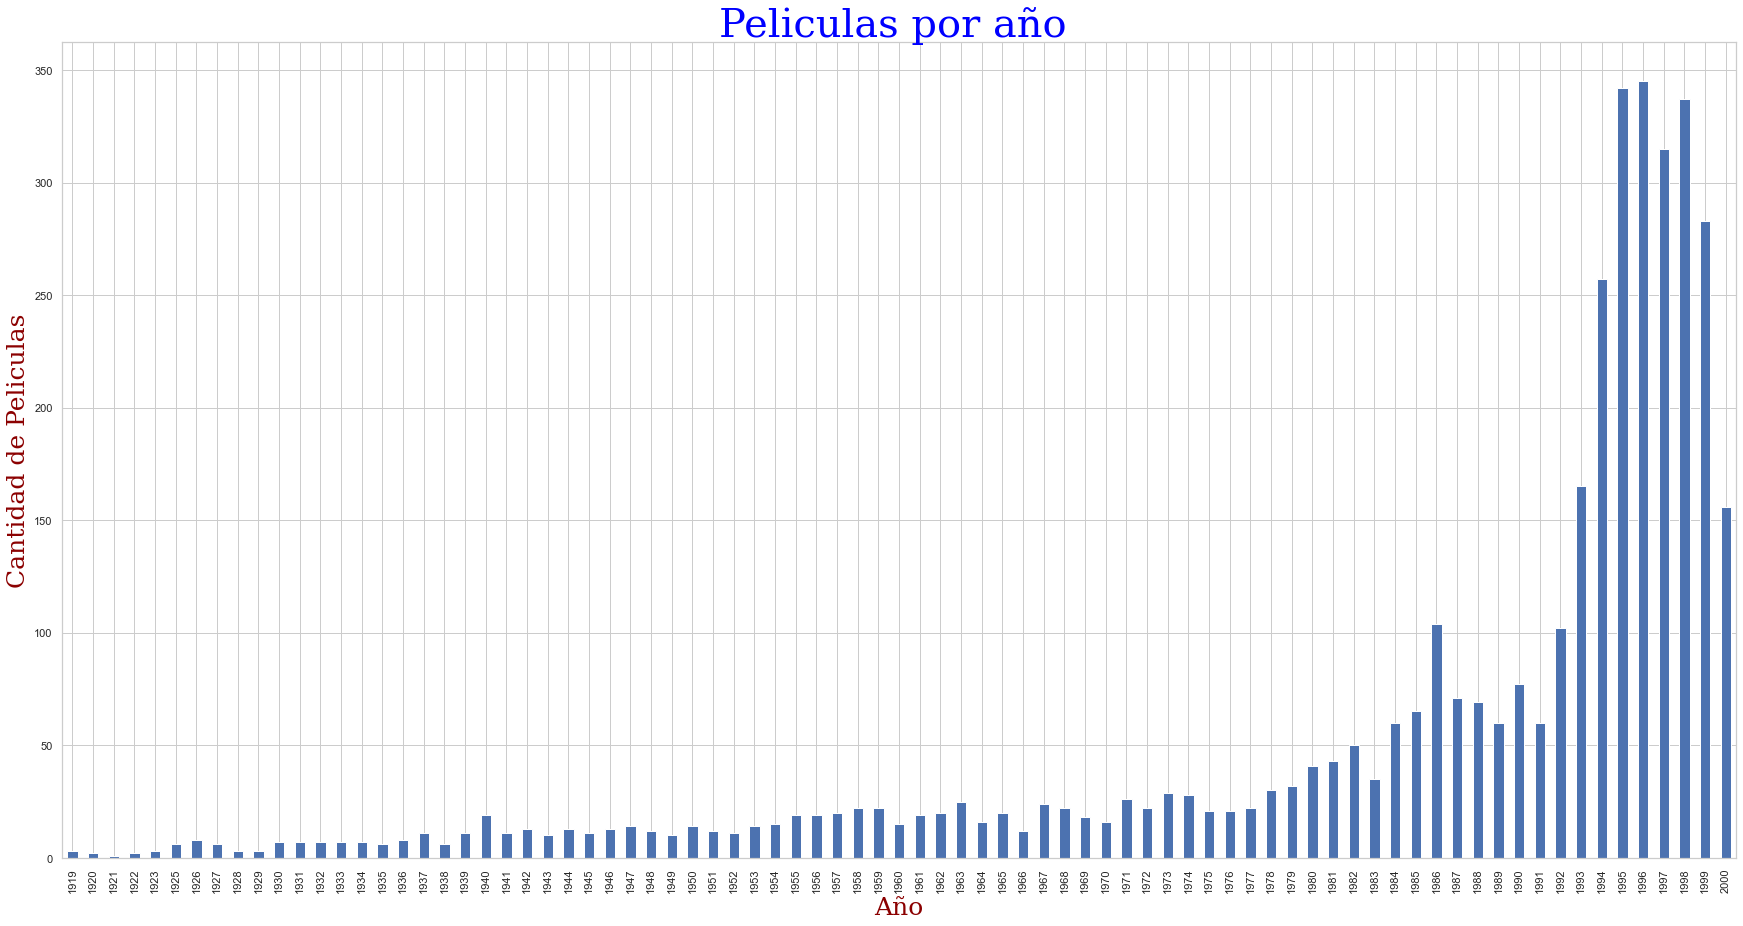

In [66]:
fig = plt.figure(figsize=(30,15))
df_movie.groupby('Año')['Nom_Pelicula'].count().plot(kind='bar')
plt.title('Peliculas por año ',fontdict = font1)
font1 = {'family':'serif','color':'blue','size':40}
font2 = {'family':'serif','color':'darkred','size':25}
plt.ylabel('Cantidad de Peliculas',fontdict = font2)
plt.xlabel('Año',fontdict = font2)
plt.savefig("Peliculasxaño.jpg", bbox_inches='tight')

*En este gráfico de barras podemos observar la cantidad de peliculas por año desde el 1919 al 2000. Se puede apreciar el gran aumento de peliculas en la última década analizada.

In [62]:
df_movie.groupby('Genero')['Nom_Pelicula'].count().sort_values()

Genero
Fantasy           2
War              12
Musical          25
Film-Noir        25
Western          33
Mystery          36
Sci-Fi           46
Romance          50
Children's       89
Animation        90
Thriller        101
Documentary     123
Crime           131
Adventure       155
Horror          262
Action          503
Comedy         1024
Drama          1176
Name: Nom_Pelicula, dtype: int64

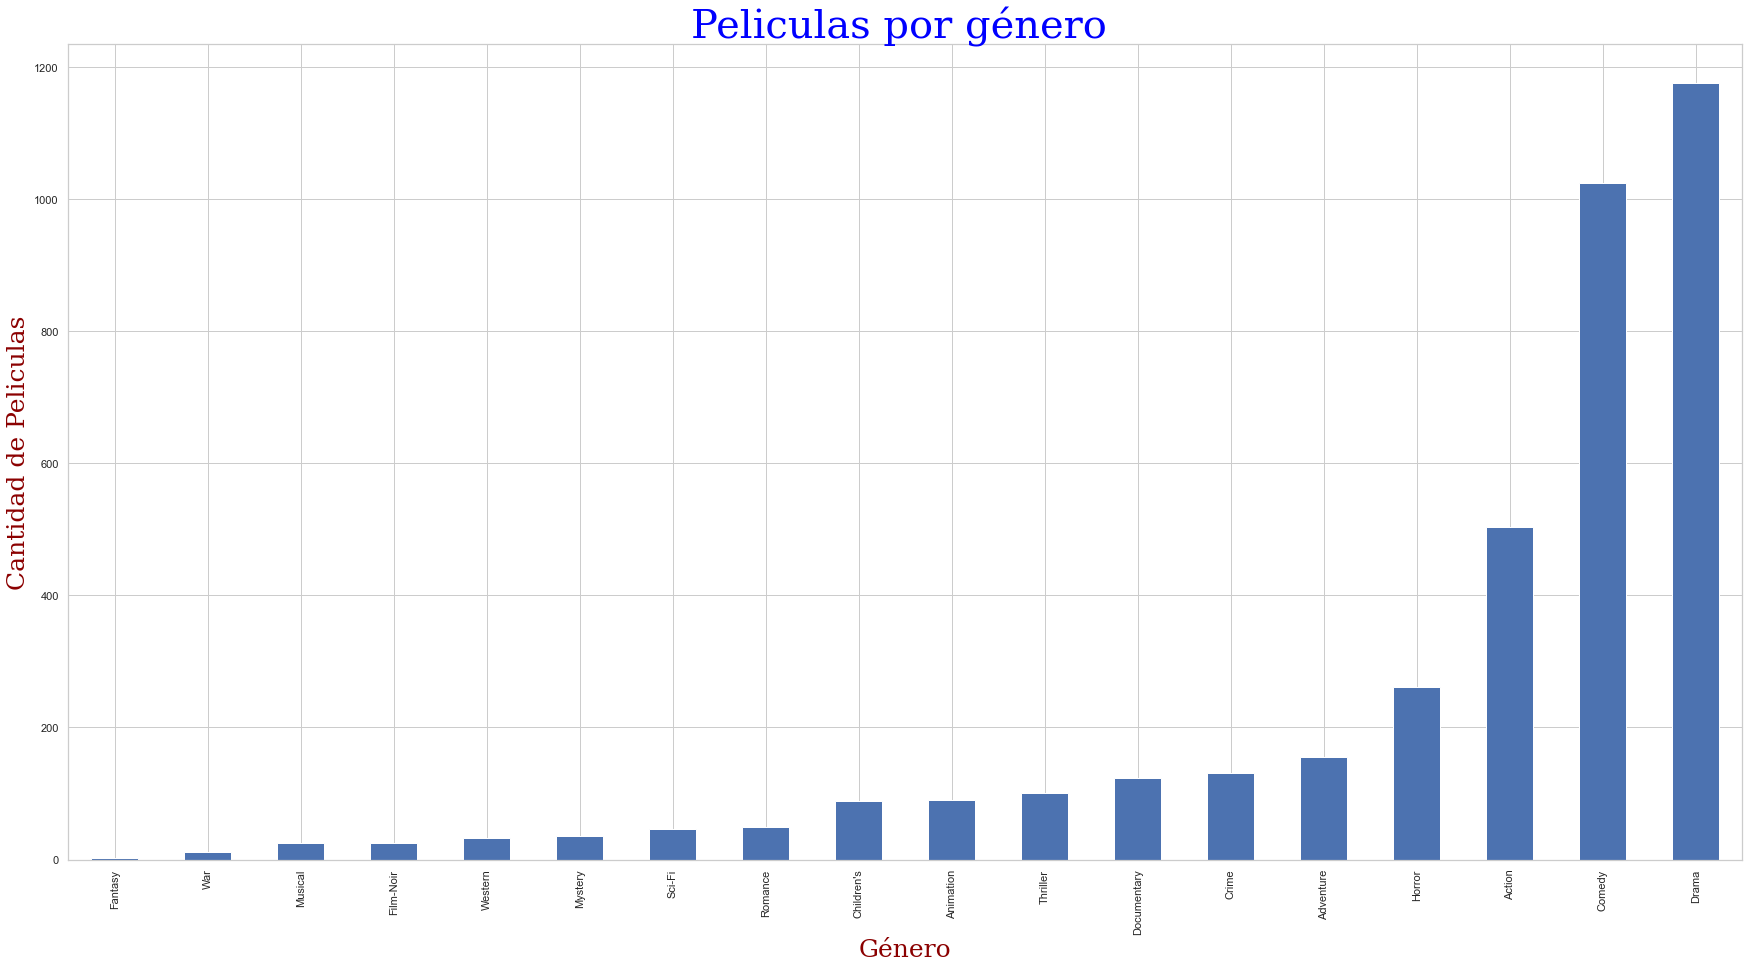

In [65]:
fig = plt.figure(figsize=(30,15))
df_movie.groupby('Genero')['Nom_Pelicula'].count().sort_values().plot(kind='bar')
plt.title('Peliculas por género ',fontdict = font1)
font1 = {'family':'serif','color':'blue','size':40}
font2 = {'family':'serif','color':'darkred','size':25}
plt.ylabel('Cantidad de Peliculas',fontdict = font2)
plt.xlabel('Género',fontdict = font2)

plt.savefig("Peliculasxgenero.jpg", bbox_inches='tight')

* En este gráfico de barras se aprecian la cantidad de películas por género. Se observa que la menor cantidad de peliculas corresponden al género Fantasia y los géneros más frecuentes son Drama, Comedia y Acción. 


Considero que a través de los gráficos de barras se puede apreciar la frecuencia en este caso de la cantidad de peliculas por año y por género. Ya que este dataset cuenta con información sobre las peliculas y tiene como variables el año y el género. 
En este tipo de gráficos se aprecia muy fácilmente la cantidad de cada variable. 

In [67]:
#Generamos el Dataframe en excel.
df_movie.to_excel("df_movie.xlsx")